<a href="https://colab.research.google.com/github/davidmuna/electric-car-sharing-service/blob/master/Moringa_Data_Science_Prep_W4_Independent_Project_2020_07_David_Muna_Python_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*Working as a data scientist in an electric car-sharing service company.I have been tasked to process stations data to understand electric car usage over time by solving for the following research question;*</font>

# Independent Project Week 4

## 1.0 Importing our Libraries

In [428]:
# Importing the pandas and numpy libraries

import pandas as pd
import numpy as np

## 1.1 Loading the Dataset from our CSV files






The dataset we will use contains Kenyan households by the main type of Roofing Material for the main dwelling unit for 2009.



*   Dataset link for download or access: [http://bit.ly/autolib_dataset

*   Dataset Description link for download or access:[https://drive.google.com/file/d/13DXF2CFWQLeYxxHFekng8HJnH_jtbfpN/view







Creating and reading our DataFrame





In [429]:
# reading the dataset and creating a dataframe

autolib = pd.read_csv('Autolib_dataset (2).csv')

## 1.2 Previewing our dataframe and accessing information about it


In [430]:
# Previewing our dataframe (3 rows)

autolib.head(3)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14


## 1.3 Accessing Information about our Dataset

In [431]:
#Accessing information about our data
autolib.info()
autolib.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

(5000, 25)

## 1.4 Cleaning our dataframe

### 1.41) <font color="green">Validity of our data</font>

In [432]:
# Dropping irrelevant data/columns Scheduled at and Displayed comment since they have 47 and 111 non-null respectively
#We also drop Cars because it it redundant with Blucars, and drop month and year

autolib.drop(["Displayed comment", "Scheduled at", "month", "year", "Cars"], axis = 1, inplace = True) 
autolib.head(3)

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,3,20,14


In [433]:
# Renaming columns, fixing syntax errors and putting column names them in lower case for standardisation

autolib.columns = autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('_counter', '').str.replace('1.4', '14')
autolib.head(3)

,address,bluecar,utilib,utilib_14,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,3,20,14


### 1.42) <font color="green">Verifying Accuracy of our data</font>
### Here, we check for precense of Outliers and identify whether we will remove them or retain them to make the data accurate and statistically significant.

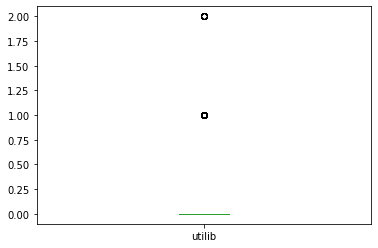

In [434]:
#Viewing the presense or absense of Outliers using a box plot for utilib variable

autolib.boxplot(column =['utilib'], grid = False) 

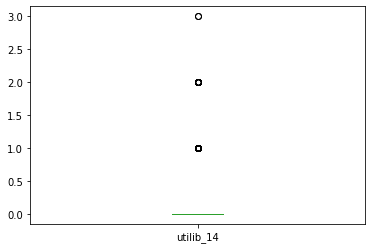

In [435]:
#Viewing the presense or absense of Outliers using a box plot for utilib_1.4 variable

autolib.boxplot(column =['utilib_14'], grid = False) 

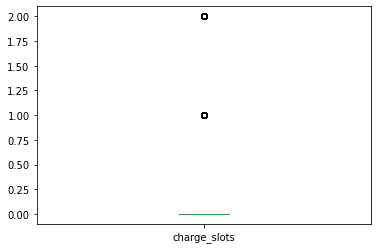

In [436]:
#Viewing the presense or absense of Outliers using a box plot for charge_slots

autolib.boxplot(column =['charge_slots'], grid = False) 

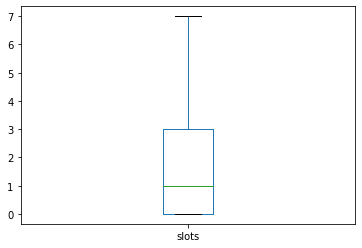

In [437]:
#Viewing the presense or absense of Outliers using a box plot for slots

autolib.boxplot(column =['slots'], grid = False) 

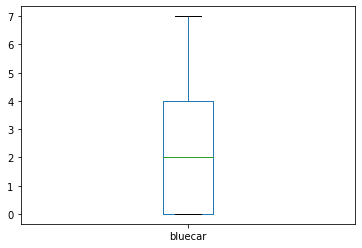

In [438]:
#Viewing the presense or absense of Outliers using a box plot for Bluecar which is redundant with cars
autolib.boxplot(column =['bluecar'], grid = False) 

### 1.42) <font color="green">Dealing/Removing Outliers</font>
### We remove the few outliers observed from the box plots above

In [439]:
#Removing Outliers in our dataframe and creating a new dataframe

Q1 = autolib.quantile(0.25)
Q3 = autolib.quantile(0.75)
IQR = Q3 - Q1

#creating a new variable to store our data that has no outliers
autolib_outliersno = autolib[~((autolib < (Q1 - 1.5 * IQR)) | (autolib > (Q3 + 1.5 * IQR)))]
autolib_outliersno.head(3)

,address,bluecar,utilib,utilib_14,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,day,hour,minute
0,2 Avenue de Suffren,0,0.0,0.0,0.0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,8,11,43
1,145 Rue Raymond Losserand,6,0.0,0.0,0.0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0.0,NaN,0.0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,3,20,14


### 1.43) <font color="green">Checking For Completeness & NaN Values</font>

In [440]:
#Checking our dataframe for null values

autolib_outliersno.isnull().sum()

#From the results below, we have removed the following Outliers from the previous step
# utilib                 286
# utilib_1.4             569
# charge_slots           994

address                  0
bluecar                  0
utilib                 286
utilib_14              569
charge_slots           994
charging_status          0
city                     0
id                       0
kind                     0
geo_point                0
postal_code              0
public_name              0
rental_status            0
slots                    0
station_type             0
status                   0
subscription_status      0
day                      0
hour                     0
minute                   0
dtype: int64

In [441]:
#Backward filling the null values since the values at the top are zero, we want to fill with whatever values are below

autolib_filled = autolib_outliersno.fillna(method='bfill')
autolib_filled.head(3)

,address,bluecar,utilib,utilib_14,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,day,hour,minute
0,2 Avenue de Suffren,0,0.0,0.0,0.0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,8,11,43
1,145 Rue Raymond Losserand,6,0.0,0.0,0.0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0.0,0.0,0.0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,3,20,14


### 1.44) <font color="green">Checking DataFrame for Consistency</font>

In [442]:
#Removing duplicates from our dataset

autolib_noduplicates = autolib_filled.drop_duplicates()

### 1.45) <font color="green">Checking Uniformity in our DataFrame<font/>

In [443]:
#Cheking data types of columns
#We leave the day, time and minute as int since it makes no difference if we convert to datetime
autolib_noduplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address              5000 non-null   object 
 1   bluecar              5000 non-null   int64  
 2   utilib               5000 non-null   float64
 3   utilib_14            5000 non-null   float64
 4   charge_slots         5000 non-null   float64
 5   charging_status      5000 non-null   object 
 6   city                 5000 non-null   object 
 7   id                   5000 non-null   object 
 8   kind                 5000 non-null   object 
 9   geo_point            5000 non-null   object 
 10  postal_code          5000 non-null   int64  
 11  public_name          5000 non-null   object 
 12  rental_status        5000 non-null   object 
 13  slots                5000 non-null   int64  
 14  station_type         5000 non-null   object 
 15  status               5000 non-null   o

### Exporting/Previewing our cleaned csv dataset

In [444]:
# Exporting cleaned dataframe to a csv file

autolib_noduplicates.to_csv('autolib_cleaned.csv', index = False)

#creating a dataset for use in correlations

autolib_correlations = pd.read_csv('autolib_cleaned.csv')

#Previewing the clean dataset
autolib_cleaned = pd.read_csv('autolib_cleaned.csv')
autolib_cleaned.head(3)

,address,bluecar,utilib,utilib_14,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,day,hour,minute
0,2 Avenue de Suffren,0,0.0,0.0,0.0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,8,11,43
1,145 Rue Raymond Losserand,6,0.0,0.0,0.0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0.0,0.0,0.0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,3,20,14


## 1.5 Research Questions

## <font color="green">Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.<font/>

In [445]:
#To do this we join successive measures of bluecar,	utilib and utilib_1.4 seperately using diff() function.

#diff() by default calculates the difference of a DataFrame element compared with the another element in the same column of the previous row
#We now assign the diff() results of the three specified columns to new columns respectively

autolib_cleaned['bluecar_diff'] = autolib_cleaned.bluecar.diff()
autolib_cleaned['utilib_diff'] = autolib_cleaned.utilib.diff()
autolib_cleaned['utilib_14_diff'] = autolib_cleaned.utilib_14.diff()

#Interpreting the diff() results will show us when a bluecar was picked or dropped off
#A negative or positive value indicates a car was picked or dropped respectively while a missing value

#We group by hour, count values by hour and sort the results based on the conditions met in descending order

paris = autolib_cleaned['city'] == 'Paris'
pickup = autolib_cleaned['bluecar_diff'] < 0

poppickinghourinparis = autolib_cleaned[paris & pickup].groupby('hour')['hour'].value_counts().sort_values(ascending = False).head(1)
poppickinghourinparis

hour  hour
21    21      80
Name: hour, dtype: int64

## <font color="green">What is the most popular hour for returning cars?<font/>

In [446]:
#Finding the overal 
#creating a variable where a car being dropped off is true
dropoff = autolib_cleaned['bluecar_diff'] > 0

#using the variable to filter the hour in our dataset
autolib_cleaned[dropoff].groupby('hour')['hour'].value_counts().sort_values(ascending = False).head(1)

hour  hour
6     6       101
Name: hour, dtype: int64

## <font color="green">What station is the most popular?
-Overall?
-At the most popular picking hour?<font/>

In [447]:
#OVERAL
#Grouping data by public_name

autolib_cleaned.groupby('public_name')['hour'].count().sort_values(ascending = False).head(1)

public_name
Paris/Porte de Montrouge/8    13
Name: hour, dtype: int64

In [448]:
#At the most popular picking hour 

pickup = autolib_cleaned['bluecar_diff'] < 0
poppickinghour = autolib_cleaned[pickup].groupby('hour')['hour'].value_counts().sort_values(ascending = False).head(1)
poppickinghour  #returns 2100 hrs

#We create a variable popularpickinghour and assign the results that meet the popular picking hour
popularpickinghour = autolib_cleaned['hour'] == 21

#Using the created variable to filter the most popular station and getting the hour and count
autolib_cleaned[popularpickinghour].groupby('public_name')['hour'].count().sort_values(ascending = False).head(1)

public_name
Paris/Tronchet/19    4
Name: hour, dtype: int64

## <font color="green">What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
-Overall?
-At the most popular picking hour?<font/>

In [449]:
#Overal
#We use a variable pickup that returns true for picking up cars
pickup = autolib_cleaned['bluecar_diff'] < 0

#Using the variable to filter through the grouped postal code
autolib_cleaned[pickup].groupby('postal_code')['hour'].count().sort_values(ascending = False).head(1)

postal_code
75015    116
Name: hour, dtype: int64

In [450]:
#At the most popular picking hour which is 2100hrs

#using the pickup and popularpickinghour variables to filter through
pickup = autolib_cleaned['bluecar_diff'] < 0
popularpickinghour = autolib_cleaned['hour'] == 21

autolib_cleaned[pickup & popularpickinghour].groupby('postal_code')['hour'].value_counts().sort_values(ascending = False).head(1)

postal_code  hour
75008        21      9
Name: hour, dtype: int64

**The most popular station(overal) does not belong to the most popular postal code(overal) for picking up bluecars**


**But at the popular hour(2100hrs), the most popular station belongs to the most popular postal code for picking up bluecars**


## <font color="green">What is the correlation between variables in the dataset?


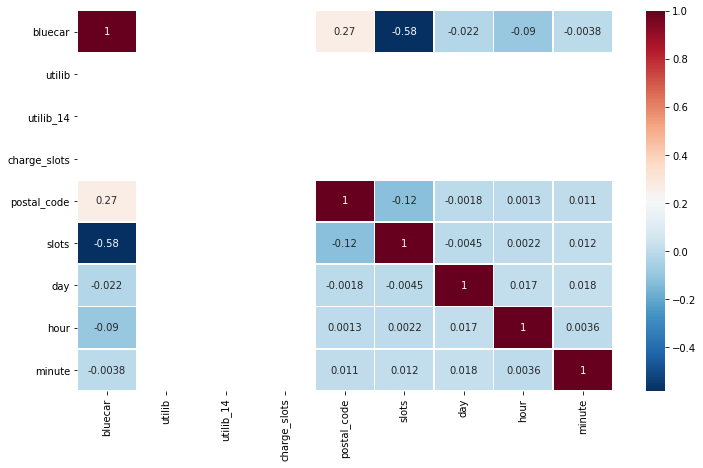

In [453]:
#Importing seaborn and matplotlib libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sb

#calculating the correlation between variables in the dataset using Perason's method
autolib_correlations1 = autolib_correlations.corr(method='pearson')

#Chosing the size of the heatmap
plt.figure(figsize = (12,7)) 

#Displaying correlations using the seaborn heatmap 
sb.heatmap(autolib_correlations1, 
            xticklabels=autolib_correlations1.columns,
            yticklabels=autolib_correlations1.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.8)